# A simple regression problem (Using Polyfit)

In this notebook, we will explore the same simple dataset that we used in notebook 3. This dataset consists of 10 samples described by one predictor `x` and one label `y`. Let's define and plot the dataset.


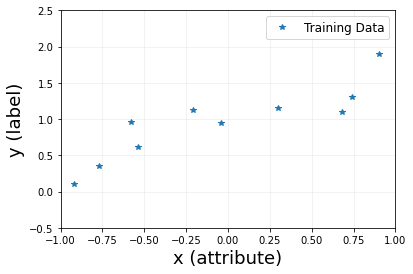

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

xTrain = np.array([0.3000, -0.7700, 0.9000, -0.0400, 0.7400, -0.5800, -0.9200, -0.2100, -0.5400, 0.6800])
yTrain = np.array([1.1492,  0.3582, 1.9013,  0.9487, 1.3096,  0.9646,  0.1079,  1.1262,  0.6131, 1.0951])

plt.plot(xTrain, yTrain, '*', label="Training Data")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)  #Alpha Changes line opacity.                #If you would like to form the graph plot less transparent, then you’ll make alpha greater than 1.
                                                                 #This solidifies the graph plot, making it less transparent and more thick and dense
plt.legend(fontsize=12)
plt.show()

Our next step will be to obtain the **least squares linear** fit. In this lab we will take advantage of the implementation of least squares provided by NumPy (`polyfit`) instead of implementing least squares ourselves. You can find more information about `polyfit` [here](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).

In [2]:
order = 1
w = np.polyfit(xTrain, yTrain, order)
print("The coefficients of the least squares linear solution are: ", w)

The coefficients of the least squares linear solution are:  [0.662 0.987]


## Checking with notebook 3

In [3]:
X = np.column_stack([np.ones(xTrain.shape), xTrain])    #column_stack() function is used to stack 1-D arrays as columns into a 2-D array.
#It takes a sequence of 1-D arrays and stack them as columns to make a single 2-D array. 2-D arrays are stacked as-is, just like with hstack function.

print("The design matrix is:\n", X)

XTX = np.dot(X.T, X) # Step 1
XTX_inv = np.linalg.inv(XTX) # Step 2
XTX_invXT = np.dot(XTX_inv, X.T) # Step 3

w = np.dot(XTX_invXT, yTrain)
print("The 2 parameters of the least squares linear solution are\n", w)

The design matrix is:
 [[ 1.    0.3 ]
 [ 1.   -0.77]
 [ 1.    0.9 ]
 [ 1.   -0.04]
 [ 1.    0.74]
 [ 1.   -0.58]
 [ 1.   -0.92]
 [ 1.   -0.21]
 [ 1.   -0.54]
 [ 1.    0.68]]
The 2 parameters of the least squares linear solution are
 [0.987 0.662]


## Parameters interchanged??

These coefficients should be the same as the ones we obtained in notebook 3 with our own implementation of least squares. 

NumPy also provides `poli1d`, a library class that encapsulates operations involving polynomials. Using `poli1d` is very simple and is described [here](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html). Let's create a *NumPy polynomial object* defined by the coefficients returned by `polyfit` and print it.

##                                                  IMP

The numpy.poly1d() function helps to define a polynomial function. It makes it easy to apply “natural operations” on polynomials.
The roots (sometimes called zeroes or solutions) of a polynomial P(x) P(x) P(x) are the values of x for which P (x) P(x) P(x) is equal to zero. Finding the roots of a polynomial is sometimes called solving the polynomial.

Syntax: numpy.poly1d(arr, root, var)
Parameters :
arr : [array_like] The polynomial coefficients are given in decreasing order of powers. If the second parameter (root) is set to True then array values are the roots of the polynomial equation.
root : [bool, optional] True means polynomial roots. Default is False.
var : variable like x, y, z that we need in polynomial [default is x].

In [4]:
p = np.poly1d(w)
print("The mathematical expression of the fitted linear model is : ", p)
print("The coefficients of the model are : ", p.c)

The mathematical expression of the fitted linear model is :   
0.9865 x + 0.6621
The coefficients of the model are :  [0.987 0.662]


Once the linear solution `p` has been created, making a prediction is easy. We just need to pass the predictor `x` to the polynomial as follows:

In [5]:
x = 0
yPred = p(x)
print("Given a predictor x = ", x, " the predicted label is y = ", yPred)

Given a predictor x =  0  the predicted label is y =  0.6621173731903968


Trying several values of $x$ to obtain the predicted label. 

## Testing

In [6]:
x1 = 1
yPred1 = p(x1)
print("Given a predictor x = ", x1, " the predicted label is y = ", yPred1)

Given a predictor x =  1  the predicted label is y =  1.6486405376107744


In [7]:
x2 = 2
yPred2 = p(x2)
print("Given a predictor x = ", x2, " the predicted label is y = ", yPred2)

Given a predictor x =  2  the predicted label is y =  2.635163702031152


Let's plot the least squares linear model together with the training dataset: 

In [8]:
x_LS = np.linspace(-1,1,100).T
y_LS = p(x_LS)

print(x_LS) 
print('---')
print(y_LS) 

[-1.    -0.98  -0.96  -0.939 -0.919 -0.899 -0.879 -0.859 -0.838 -0.818
 -0.798 -0.778 -0.758 -0.737 -0.717 -0.697 -0.677 -0.657 -0.636 -0.616
 -0.596 -0.576 -0.556 -0.535 -0.515 -0.495 -0.475 -0.455 -0.434 -0.414
 -0.394 -0.374 -0.354 -0.333 -0.313 -0.293 -0.273 -0.253 -0.232 -0.212
 -0.192 -0.172 -0.152 -0.131 -0.111 -0.091 -0.071 -0.051 -0.03  -0.01
  0.01   0.03   0.051  0.071  0.091  0.111  0.131  0.152  0.172  0.192
  0.212  0.232  0.253  0.273  0.293  0.313  0.333  0.354  0.374  0.394
  0.414  0.434  0.455  0.475  0.495  0.515  0.535  0.556  0.576  0.596
  0.616  0.636  0.657  0.677  0.697  0.717  0.737  0.758  0.778  0.798
  0.818  0.838  0.859  0.879  0.899  0.919  0.939  0.96   0.98   1.   ]
---
[-0.324 -0.304 -0.285 -0.265 -0.245 -0.225 -0.205 -0.185 -0.165 -0.145
 -0.125 -0.105 -0.085 -0.065 -0.045 -0.025 -0.006  0.014  0.034  0.054
  0.074  0.094  0.114  0.134  0.154  0.174  0.194  0.214  0.234  0.254
  0.273  0.293  0.313  0.333  0.353  0.373  0.393  0.413  0.433  0.453
  

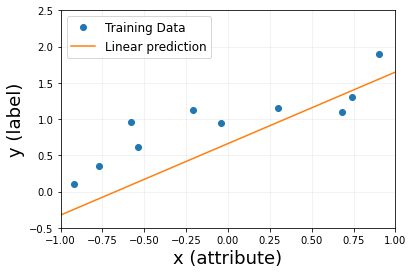

In [9]:
plt.plot(xTrain, yTrain, 'o', label="Training Data")
plt.plot(x_LS, y_LS, label="Linear prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

What is the quality of this linear model? Least squares uses the mean squared error (MSE) as its quality metric. MSE is defined as 

$E_{MSE} = \frac{1}{N}\sum_{i=1}^{N}{e_i^2}=\frac{1}{N}\sum_{i=1}^{N}{(y_i-\hat{y}_i)^2}$ 

where $N$ is the number of samples, $y_i$ is the true label and $\hat{y}_i$ is the predicted label. Let's show step by step how to obtain the training MSE of the fitted linear model:



In [10]:
yPredTrain = p(xTrain)
error = yTrain - yPredTrain
errorSq = error**2
MSETrain = np.sum(errorSq)/10

print("The predictors are ", xTrain)

print("\nThe true labels are ", yTrain)

print("\nThe predicted labels s are ", yPredTrain)

print("\nThe errors are ", error)

print("\nThe squared errors are ", errorSq)

print("\nThe training MSE is ", MSETrain)

The predictors are  [ 0.3  -0.77  0.9  -0.04  0.74 -0.58 -0.92 -0.21 -0.54  0.68]

The true labels are  [1.149 0.358 1.901 0.949 1.31  0.965 0.108 1.126 0.613 1.095]

The predicted labels s are  [ 0.958 -0.098  1.55   0.623  1.392  0.09  -0.245  0.455  0.129  1.333]

The errors are  [ 0.191  0.456  0.351  0.326 -0.083  0.875  0.353  0.671  0.484 -0.238]

The squared errors are  [0.037 0.208 0.123 0.106 0.007 0.765 0.125 0.451 0.234 0.057]

The training MSE is  0.2111780057971034
